In [ ]:
import os
os.chdir("../code/data")

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (16, 6)

In [ ]:
import numpy as np

## train.csv 탐색 및 전처리

In [ ]:
import pandas as pd
df = pd.read_csv("new_transaction_5years.csv", engine = "python", encoding = "utf8")

In [ ]:
df.head(3)

,Unnamed: 0,city,apt,exclusive_use_area,transaction_year_month,transaction_date,transaction_real_price,floor,year_of_completion,addr_x,addr_y,x,y,거리,구분
0,0,서울특별시 강남구 개포동,개포2차현대아파트(220),77.75,201603,28,75000,5,1988,언주로 103,서울특별시 강남구 개포동 언주로 103,127.052894,37.481334,0.807126,간접역세권
1,1,서울특별시 강남구 개포동,개포2차현대아파트(220),77.75,201604,2,71000,2,1988,언주로 103,서울특별시 강남구 개포동 언주로 103,127.052894,37.481334,0.807126,간접역세권
2,2,서울특별시 강남구 개포동,개포2차현대아파트(220),77.75,201605,6,76900,9,1988,언주로 103,서울특별시 강남구 개포동 언주로 103,127.052894,37.481334,0.807126,간접역세권


#### `Unnamed: 0` 제거하기

In [ ]:
del df['Unnamed: 0']

#### 역세권 관련 불필요 열 제거하기

In [ ]:
df = df.drop(['addr_x','addr_y','x','y'],axis=1)
df.head(1)

,city,apt,exclusive_use_area,transaction_year_month,transaction_date,transaction_real_price,floor,year_of_completion,거리,구분
0,서울특별시 강남구 개포동,개포2차현대아파트(220),77.75,201603,28,75000,5,1988,0.807126,간접역세권


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456313 entries, 0 to 456312
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   city                    456313 non-null  object 
 1   apt                     456313 non-null  object 
 2   exclusive_use_area      456313 non-null  float64
 3   transaction_year_month  456313 non-null  int64  
 4   transaction_date        456313 non-null  int64  
 5   transaction_real_price  456313 non-null  int64  
 6   floor                   456313 non-null  int64  
 7   year_of_completion      456313 non-null  int64  
 8   거리                      456313 non-null  float64
 9   구분                      456313 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 34.8+ MB


#### 결측치 처리

In [ ]:
df[df.isnull().any(axis=1)].index.shape

(0,)

In [ ]:
df.drop(df[df.isnull().any(axis=1)].index, axis=0 , inplace=True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456313 entries, 0 to 456312
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   city                    456313 non-null  object 
 1   apt                     456313 non-null  object 
 2   exclusive_use_area      456313 non-null  float64
 3   transaction_year_month  456313 non-null  int64  
 4   transaction_date        456313 non-null  int64  
 5   transaction_real_price  456313 non-null  int64  
 6   floor                   456313 non-null  int64  
 7   year_of_completion      456313 non-null  int64  
 8   거리                      456313 non-null  float64
 9   구분                      456313 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 34.8+ MB


#### 아파트 top10브랜드인지(1) 아닌지(0):  `top10_apt` 변수 생성

In [ ]:
import re
from tqdm.notebook import tqdm 

In [ ]:
df['apt_nm'] = 'apt_name'
for i in tqdm(range(len(df))):
   df.at[i, 'apt_nm'] = re.sub('\(.*\)|\s-\s.*', '', df.at[i,'apt'])
df.head(1)

  0%|          | 0/456313 [00:00<?, ?it/s]

,city,apt,exclusive_use_area,transaction_year_month,transaction_date,transaction_real_price,floor,year_of_completion,거리,구분,apt_nm
0,서울특별시 강남구 개포동,개포2차현대아파트(220),77.75,201603,28,75000,5,1988,0.807126,간접역세권,개포2차현대아파트


In [ ]:
top10 = ['자이', '푸르지오', '더샵', '롯데캐슬', '이편한|e편한|e-편한',
         '힐스테이트', '아이파크|I\'PARK|I-Park|IPARK|I-PARK', '래미안', 'sk|SK|Sk|sK|에스케이', '플래티넘']

In [ ]:
df['top10_apt'] = 0
for brand in tqdm(top10):
    df.loc[df['apt_nm'].str.contains(brand),'top10_apt'] = 1
df.head(2)

  0%|          | 0/10 [00:00<?, ?it/s]

,city,apt,exclusive_use_area,transaction_year_month,transaction_date,transaction_real_price,floor,year_of_completion,거리,구분,apt_nm,top10_apt
0,서울특별시 강남구 개포동,개포2차현대아파트(220),77.75,201603,28,75000,5,1988,0.807126,간접역세권,개포2차현대아파트,0
1,서울특별시 강남구 개포동,개포2차현대아파트(220),77.75,201604,2,71000,2,1988,0.807126,간접역세권,개포2차현대아파트,0


#### 시-구-동 나누기

In [ ]:
city_name = df['city'].str.split(' ',expand=True)
city_name.head()

,0,1,2
0,서울특별시,강남구,개포동
1,서울특별시,강남구,개포동
2,서울특별시,강남구,개포동
3,서울특별시,강남구,개포동
4,서울특별시,강남구,개포동


In [ ]:
city_name.rename(columns = {0 : 'city_nm', 1: '시군구', 2 : 'dong' }, inplace=True)
city_name.head()

,city_nm,시군구,dong
0,서울특별시,강남구,개포동
1,서울특별시,강남구,개포동
2,서울특별시,강남구,개포동
3,서울특별시,강남구,개포동
4,서울특별시,강남구,개포동


In [ ]:
city_name.shape

(456313, 3)

In [ ]:
df = pd.concat([df,city_name],axis = 1)
df.head(2)

,city,apt,exclusive_use_area,transaction_year_month,transaction_date,transaction_real_price,floor,year_of_completion,거리,구분,apt_nm,top10_apt,city_nm,시군구,dong
0,서울특별시 강남구 개포동,개포2차현대아파트(220),77.75,201603,28,75000,5,1988,0.807126,간접역세권,개포2차현대아파트,0,서울특별시,강남구,개포동
1,서울특별시 강남구 개포동,개포2차현대아파트(220),77.75,201604,2,71000,2,1988,0.807126,간접역세권,개포2차현대아파트,0,서울특별시,강남구,개포동


In [ ]:
del df['city']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456313 entries, 0 to 456312
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   apt                     456313 non-null  object 
 1   exclusive_use_area      456313 non-null  float64
 2   transaction_year_month  456313 non-null  int64  
 3   transaction_date        456313 non-null  int64  
 4   transaction_real_price  456313 non-null  int64  
 5   floor                   456313 non-null  int64  
 6   year_of_completion      456313 non-null  int64  
 7   거리                      456313 non-null  float64
 8   구분                      456313 non-null  object 
 9   apt_nm                  456313 non-null  object 
 10  top10_apt               456313 non-null  int64  
 11  city_nm                 456313 non-null  object 
 12  시군구                     456313 non-null  object 
 13  dong                    456313 non-null  object 
dtypes: float64(2), int64

In [ ]:
df.rename(columns = {'city_nm':'city'}, inplace=True)

In [ ]:
df.head(1)

,apt,exclusive_use_area,transaction_year_month,transaction_date,transaction_real_price,floor,year_of_completion,거리,구분,apt_nm,top10_apt,city,시군구,dong
0,개포2차현대아파트(220),77.75,201603,28,75000,5,1988,0.807126,간접역세권,개포2차현대아파트,0,서울특별시,강남구,개포동


#### `age`변수 생성
- 2018 -> 2021로 변경

In [ ]:
# 건축된지 얼마나 되었는지를 나타내는 변수로 변환
df['age'] = 2021 - df['year_of_completion']
df.drop('year_of_completion', axis = 1, inplace = True)

In [ ]:
df.head(1)

,apt,exclusive_use_area,transaction_year_month,transaction_date,transaction_real_price,floor,거리,구분,apt_nm,top10_apt,city,시군구,dong,age
0,개포2차현대아파트(220),77.75,201603,28,75000,5,0.807126,간접역세권,개포2차현대아파트,0,서울특별시,강남구,개포동,33


#### 거래 연도-월 분리하기

In [ ]:
df['transaction_year_month'] = df['transaction_year_month'].astype(int)

In [ ]:
df['transaction_year_month'] = df['transaction_year_month'].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456313 entries, 0 to 456312
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   apt                     456313 non-null  object 
 1   exclusive_use_area      456313 non-null  float64
 2   transaction_year_month  456313 non-null  object 
 3   transaction_date        456313 non-null  int64  
 4   transaction_real_price  456313 non-null  int64  
 5   floor                   456313 non-null  int64  
 6   거리                      456313 non-null  float64
 7   구분                      456313 non-null  object 
 8   apt_nm                  456313 non-null  object 
 9   top10_apt               456313 non-null  int64  
 10  city                    456313 non-null  object 
 11  시군구                     456313 non-null  object 
 12  dong                    456313 non-null  object 
 13  age                     456313 non-null  int64  
dtypes: float64(2), int64

In [ ]:
df['transaction_year_month'].str[:4].astype(int)

0         2016
1         2016
2         2016
3         2016
4         2016
          ... 
456308    2020
456309    2020
456310    2020
456311    2020
456312    2020
Name: transaction_year_month, Length: 456313, dtype: int32

In [ ]:
df['transaction_year_month'].str[4:].astype(int)

0          3
1          4
2          5
3          5
4         12
          ..
456308     5
456309     5
456310     5
456311     5
456312     7
Name: transaction_year_month, Length: 456313, dtype: int32

In [ ]:
df['transaction_year'] = df['transaction_year_month'].str[:4].astype(int)
df['transaction_month'] = df['transaction_year_month'].str[4:].astype(int)
del df['transaction_year_month']

In [ ]:
df.head(1)

,apt,exclusive_use_area,transaction_date,transaction_real_price,floor,거리,구분,apt_nm,top10_apt,city,시군구,dong,age,transaction_year,transaction_month
0,개포2차현대아파트(220),77.75,28,75000,5,0.807126,간접역세권,개포2차현대아파트,0,서울특별시,강남구,개포동,33,2016,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456313 entries, 0 to 456312
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   apt                     456313 non-null  object 
 1   exclusive_use_area      456313 non-null  float64
 2   transaction_date        456313 non-null  int64  
 3   transaction_real_price  456313 non-null  int64  
 4   floor                   456313 non-null  int64  
 5   거리                      456313 non-null  float64
 6   구분                      456313 non-null  object 
 7   apt_nm                  456313 non-null  object 
 8   top10_apt               456313 non-null  int64  
 9   city                    456313 non-null  object 
 10  시군구                     456313 non-null  object 
 11  dong                    456313 non-null  object 
 12  age                     456313 non-null  int64  
 13  transaction_year        456313 non-null  int32  
 14  transaction_month   

#### `floor` 변수 전처리
- 0 층 이하 제거하기

In [ ]:
df.drop(df[df['floor'] < 1].index,inplace=True)

<AxesSubplot:xlabel='floor'>

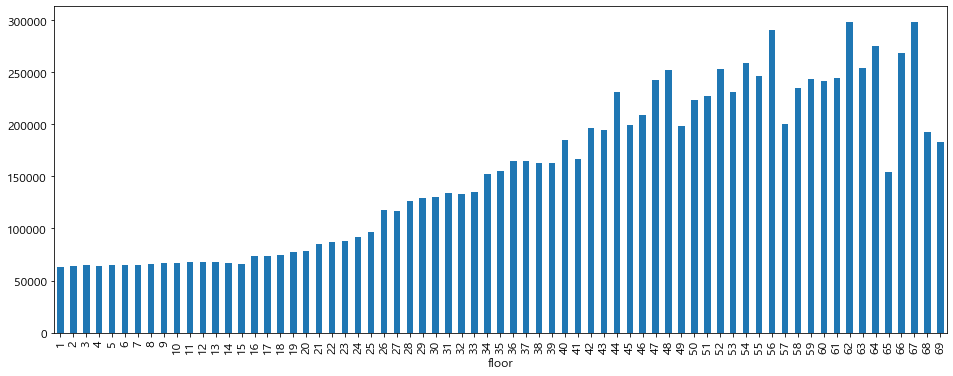

In [ ]:
df.groupby(['floor'])['transaction_real_price'].mean().plot(kind = 'bar')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456206 entries, 0 to 456312
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   apt                     456206 non-null  object 
 1   exclusive_use_area      456206 non-null  float64
 2   transaction_date        456206 non-null  int64  
 3   transaction_real_price  456206 non-null  int64  
 4   floor                   456206 non-null  int64  
 5   거리                      456206 non-null  float64
 6   구분                      456206 non-null  object 
 7   apt_nm                  456206 non-null  object 
 8   top10_apt               456206 non-null  int64  
 9   city                    456206 non-null  object 
 10  시군구                     456206 non-null  object 
 11  dong                    456206 non-null  object 
 12  age                     456206 non-null  int64  
 13  transaction_year        456206 non-null  int32  
 14  transaction_month   

#### 시세 변수 추가

In [ ]:
# 구별 전체 평균 시세 부착
mean_price_per_gu = df.groupby(['city', '시군구'], as_index = False)['transaction_real_price'].mean()
mean_price_per_gu.rename({'transaction_real_price':'구별_전체_평균_시세'}, axis = 1, inplace = True)
df = pd.merge(df, mean_price_per_gu, on = ['city', '시군구']) 

In [ ]:
# 구별 작년 시세 부착
# price_per_gu_and_year 변수에 직접 수정을 하므로, df가 변경되는 것을 방지하기 위해, df.copy().groupby~를 사용
price_per_gu_and_year = df.copy().groupby(['city', '시군구', 'transaction_year'], as_index = False)['transaction_real_price'].agg(['mean', 'count'])
price_per_gu_and_year = price_per_gu_and_year.reset_index().rename({"mean":"구별_작년_평균_시세", "count":"구별_작년_거래량"}, axis = 1)

price_per_gu_and_year['transaction_year'] += 1 # 작년것을 붙이기 위해, 1을 더함
df = pd.merge(df, price_per_gu_and_year, on = ['city', '시군구', 'transaction_year'], how = 'left') # 작년 기록이 없어서 붙지 않는 것을 방지하기 위해, how = 'left'로 설정
# 작년 거래량 기록이 없기에 0으로.
df['구별_작년_거래량'].fillna(0, inplace = True) # 구별 작년 거래 데이터가 없다는 것은, 구별 작년 거래량이 0이라는 이야기이므로 fillna(0)을 수행

In [ ]:
df.head(1)

,apt,exclusive_use_area,transaction_date,transaction_real_price,floor,거리,구분,apt_nm,top10_apt,city,시군구,dong,age,transaction_year,transaction_month,구별_전체_평균_시세,구별_작년_평균_시세,구별_작년_거래량
0,개포2차현대아파트(220),77.75,28,75000,5,0.807126,간접역세권,개포2차현대아파트,0,서울특별시,강남구,개포동,33,2016,3,142793.218401,NaN,0.0


#### `동`별 평균가격 변수 추가하기

In [ ]:
dong_price = df.groupby(['시군구','dong'],as_index=False)['transaction_real_price'].mean()
dong_price.head()

,시군구,dong,transaction_real_price
0,강남구,개포동,123957.249155
1,강남구,논현동,100072.226212
2,강남구,대치동,172892.469650
3,강남구,도곡동,155199.824674
4,강남구,삼성동,149635.613540


In [ ]:
dong_price.rename(columns = {'transaction_real_price':'dong_mean_price'}, inplace=True)

In [ ]:
dong_price.head()

,시군구,dong,dong_mean_price
0,강남구,개포동,123957.249155
1,강남구,논현동,100072.226212
2,강남구,대치동,172892.469650
3,강남구,도곡동,155199.824674
4,강남구,삼성동,149635.613540


In [ ]:
df = pd.merge(df, dong_price, how='left', left_on = ['시군구','dong'],right_on=['시군구','dong'])
df.head(1)

,apt,exclusive_use_area,transaction_date,transaction_real_price,floor,거리,구분,apt_nm,top10_apt,city,시군구,dong,age,transaction_year,transaction_month,구별_전체_평균_시세,구별_작년_평균_시세,구별_작년_거래량,dong_mean_price
0,개포2차현대아파트(220),77.75,28,75000,5,0.807126,간접역세권,개포2차현대아파트,0,서울특별시,강남구,개포동,33,2016,3,142793.218401,NaN,0.0,123957.249155


## 외부 데이터 부착

In [ ]:
pd.options.display.max_columns = 200

#### `인구당편의시설.csv`  마트, 병원 데이터 합치기

In [ ]:
amenity = pd.read_csv("인구당편의시설.csv", engine = "python", encoding = "utf8")
amenity.head(2)

,구,stud_per_elementary,stud_per_middle,stud_per_high,인구당대형마트수,인구당백화점수,인구당쇼핑센터수,인구당합계쇼핑수,인구당병원수
0,종로구,399,310,605,0.000000,0.000000,0.000000,0.000000,6.484454
1,중구,416,231,612,1.515324,2.272986,6.061295,9.849604,8.334280


In [ ]:
amenity.columns

Index(['구', 'stud_per_elementary', 'stud_per_middle', 'stud_per_high',
       '인구당대형마트수', '인구당백화점수', '인구당쇼핑센터수', '인구당합계쇼핑수', '인구당병원수'],
      dtype='object')

In [ ]:
amenity = amenity.drop(['stud_per_elementary', 'stud_per_middle', 'stud_per_high',
       '인구당대형마트수', '인구당백화점수', '인구당쇼핑센터수'],axis=1)
amenity.head()

,구,인구당합계쇼핑수,인구당병원수
0,종로구,0.000000,6.484454
1,중구,9.849604,8.334280
2,용산구,2.519727,1.259864
3,성동구,0.680610,3.743356
4,광진구,0.849851,3.682688


In [ ]:
amenity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   구         25 non-null     object 
 1   인구당합계쇼핑수  25 non-null     float64
 2   인구당병원수    25 non-null     float64
dtypes: float64(2), object(1)
memory usage: 728.0+ bytes


In [ ]:
df = pd.merge(df, amenity,left_on='시군구',right_on='구',how='left')
df.head(1)

,apt,exclusive_use_area,transaction_date,transaction_real_price,floor,거리,구분,apt_nm,top10_apt,city,시군구,dong,age,transaction_year,transaction_month,구별_전체_평균_시세,구별_작년_평균_시세,구별_작년_거래량,dong_mean_price,구,인구당합계쇼핑수,인구당병원수
0,개포2차현대아파트(220),77.75,28,75000,5,0.807126,간접역세권,개포2차현대아파트,0,서울특별시,강남구,개포동,33,2016,3,142793.218401,NaN,0.0,123957.249155,강남구,1.85651,12.995572


In [ ]:
del df['apt_nm']

In [ ]:
del df['구']

#### `walk_course.csv` 정보 추가하기

In [ ]:
walk = pd.read_csv("walk_course.csv", engine = "python", encoding = "utf8")
walk.head()

,Unnamed: 0,gu,course_count,course_mean
0,0,강남구,185,1.108108
1,1,강동구,98,1.653061
2,2,강북구,41,2.048780
3,3,강서구,167,0.568862
4,4,관악구,68,2.235294


In [ ]:
del walk['Unnamed: 0']
del walk['course_count']

In [ ]:
df = pd.merge(df, walk,left_on='시군구',right_on='gu',how='left')
df.head(1)

,apt,exclusive_use_area,transaction_date,transaction_real_price,floor,거리,구분,top10_apt,city,시군구,dong,age,transaction_year,transaction_month,구별_전체_평균_시세,구별_작년_평균_시세,구별_작년_거래량,dong_mean_price,인구당합계쇼핑수,인구당병원수,gu,course_mean
0,개포2차현대아파트(220),77.75,28,75000,5,0.807126,간접역세권,0,서울특별시,강남구,개포동,33,2016,3,142793.218401,NaN,0.0,123957.249155,1.85651,12.995572,강남구,1.108108


In [ ]:
del df['gu']

#### `institution.csv` 학원 정보 추가하기

In [ ]:
academy = pd.read_csv("school_institution_agg.csv", engine = "python", encoding = "utf8")
academy.head()

,Unnamed: 0,addr_gu,elementary_num,high_num,middle_num,stud_per_elementary,stud_per_middle,stud_per_high,s_high_num,middle_to_s_high,academic,english,art,institution_num,num_per_10k
0,0,강남구,33,22,24,785,650,811,4,20.3,1227,188,249,2361,397.8
1,1,강동구,29,14,19,763,559,783,2,12.6,418,22,137,724,170.9
2,2,강북구,14,7,13,708,472,764,1,20.4,137,3,36,206,96.3
3,3,강서구,35,23,22,745,486,652,2,8.2,429,30,153,694,134.1
4,4,관악구,22,17,16,655,445,540,0,6.9,223,13,94,431,140.3


In [ ]:
academy.columns

Index(['Unnamed: 0', 'addr_gu', 'elementary_num', 'high_num', 'middle_num',
       'stud_per_elementary', 'stud_per_middle', 'stud_per_high', 's_high_num',
       'middle_to_s_high', 'academic', 'english', 'art', 'institution_num',
       'num_per_10k'],
      dtype='object')

In [ ]:
academy = academy.drop(['Unnamed: 0','elementary_num', 'high_num', 'middle_num','academic', 'english', 'art','num_per_10k'],axis=1)
academy.head()

,addr_gu,stud_per_elementary,stud_per_middle,stud_per_high,s_high_num,middle_to_s_high,institution_num
0,강남구,785,650,811,4,20.3,2361
1,강동구,763,559,783,2,12.6,724
2,강북구,708,472,764,1,20.4,206
3,강서구,745,486,652,2,8.2,694
4,관악구,655,445,540,0,6.9,431


In [ ]:
df = pd.merge(df,academy,left_on='시군구',right_on= 'addr_gu',how='left')
df.head(1)

,apt,exclusive_use_area,transaction_date,transaction_real_price,floor,거리,구분,top10_apt,city,시군구,dong,age,transaction_year,transaction_month,구별_전체_평균_시세,구별_작년_평균_시세,구별_작년_거래량,dong_mean_price,인구당합계쇼핑수,인구당병원수,course_mean,addr_gu,stud_per_elementary,stud_per_middle,stud_per_high,s_high_num,middle_to_s_high,institution_num
0,개포2차현대아파트(220),77.75,28,75000,5,0.807126,간접역세권,0,서울특별시,강남구,개포동,33,2016,3,142793.218401,NaN,0.0,123957.249155,1.85651,12.995572,1.108108,강남구,785,650,811,4,20.3,2361


In [ ]:
del df['addr_gu']

#### `info_gu.csv` 추가하기

In [ ]:
gu_info = pd.read_csv("info_gu.csv", engine = "python", encoding = "utf8")
gu_info.head()

,Unnamed: 0,addr_gu,density,fiscal_sr,ratio_ed
0,0,종로구,6649,47.2,0.414463
1,1,중구,13517,55.3,0.364519
2,2,용산구,11188,41.7,0.429672
3,3,성동구,17822,33.2,0.408386
4,4,광진구,21105,26.1,0.376369


In [ ]:
del gu_info['Unnamed: 0']

In [ ]:
df = pd.merge(df,gu_info,left_on='시군구',right_on= 'addr_gu',how='left')
del df['addr_gu']
df.head(1)

,apt,exclusive_use_area,transaction_date,transaction_real_price,floor,거리,구분,top10_apt,city,시군구,dong,age,transaction_year,transaction_month,구별_전체_평균_시세,구별_작년_평균_시세,구별_작년_거래량,dong_mean_price,인구당합계쇼핑수,인구당병원수,course_mean,stud_per_elementary,stud_per_middle,stud_per_high,s_high_num,middle_to_s_high,institution_num,density,fiscal_sr,ratio_ed
0,개포2차현대아파트(220),77.75,28,75000,5,0.807126,간접역세권,0,서울특별시,강남구,개포동,33,2016,3,142793.218401,NaN,0.0,123957.249155,1.85651,12.995572,1.108108,785,650,811,4,20.3,2361,13773,54.9,0.541647


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456206 entries, 0 to 456205
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   apt                     456206 non-null  object 
 1   exclusive_use_area      456206 non-null  float64
 2   transaction_date        456206 non-null  int64  
 3   transaction_real_price  456206 non-null  int64  
 4   floor                   456206 non-null  int64  
 5   거리                      456206 non-null  float64
 6   구분                      456206 non-null  object 
 7   top10_apt               456206 non-null  int64  
 8   city                    456206 non-null  object 
 9   시군구                     456206 non-null  object 
 10  dong                    456206 non-null  object 
 11  age                     456206 non-null  int64  
 12  transaction_year        456206 non-null  int32  
 13  transaction_month       456206 non-null  int32  
 14  구별_전체_평균_시세         

In [ ]:
df.columns

Index(['apt', 'exclusive_use_area', 'transaction_date',
       'transaction_real_price', 'floor', '거리', '구분', 'top10_apt', 'city',
       '시군구', 'dong', 'age', 'transaction_year', 'transaction_month',
       '구별_전체_평균_시세', '구별_작년_평균_시세', '구별_작년_거래량', 'dong_mean_price',
       '인구당합계쇼핑수', '인구당병원수', 'course_mean', 'stud_per_elementary',
       'stud_per_middle', 'stud_per_high', 's_high_num', 'middle_to_s_high',
       'institution_num', 'density', 'fiscal_sr', 'ratio_ed'],
      dtype='object')

### 모델 학습

In [ ]:
X = df.drop(['apt', 'transaction_date','transaction_real_price','city','거리','시군구', 'dong',
        'transaction_year', 'transaction_month'], axis = 1)
Y = df['transaction_real_price']

In [ ]:
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)
Train_X.shape # 샘플 대비 특징이 매우 적음 => 큰 부담없이 더미화 가능
# 컬럼 타입이 섞여 있으므로, 트리 계열의 모델이 적절한 것으로 판단됨
# 또한, 샘플이 충분히 많으므로 트리 뿐만 아니라 트리 기반의 앙상블도 적절할 것으로 보임
# Tip. Decision Tree 계열의 모델은 상대적으로 전처리나 탐색의 부담이 제일 적은 모델임

(342154, 21)

In [ ]:
Train_X.columns

Index(['exclusive_use_area', 'floor', '구분', 'top10_apt', 'age', '구별_전체_평균_시세',
       '구별_작년_평균_시세', '구별_작년_거래량', 'dong_mean_price', '인구당합계쇼핑수', '인구당병원수',
       'course_mean', 'stud_per_elementary', 'stud_per_middle',
       'stud_per_high', 's_high_num', 'middle_to_s_high', 'institution_num',
       'density', 'fiscal_sr', 'ratio_ed'],
      dtype='object')

In [ ]:
#!pip install feature_engine

In [ ]:
# 역세권 변수 더미화
#from feature_engine.categorical_encoders import OneHotCategoricalEncoder as OHE
from feature_engine.encoding import OneHotEncoder as OHE
dummy_model = OHE(variables = ['구분'],
                 drop_last = False)

dummy_model.fit(Train_X)

Train_X = dummy_model.transform(Train_X)
Test_X = dummy_model.transform(Test_X)

In [ ]:
# 변수 부착 과정에서 생성된 결측 대체
from sklearn.impute import SimpleImputer as SI
imputer = SI().fit(Train_X) # DEFAULT: MEAN으로 대체
# imputer.transform(Train_X): nd.array
Train_X = pd.DataFrame(imputer.transform(Train_X), columns = Train_X.columns)
Test_X = pd.DataFrame(imputer.transform(Test_X), columns = Test_X.columns)

In [ ]:
#!pip install xgboost

In [ ]:
#!pip install lightgbm

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.feature_selection import *
from sklearn.ensemble import RandomForestRegressor as RFR
from xgboost import XGBRegressor as XGB
from lightgbm import LGBMRegressor as LGB

In [ ]:
model_parameter_dict = dict()
RFR_parameter_grid = ParameterGrid({"max_depth":[3, 4, 5],
                                   "n_estimators": [100, 200]})

XL_parameter_grid = ParameterGrid({"max_depth":[3, 4, 5],
                                  "n_estimators": [100, 200],
                                  "learning_rate": [0.05, 0.1, 0.2]})

model_parameter_dict[RFR] = RFR_parameter_grid
model_parameter_dict[XGB] = XL_parameter_grid
model_parameter_dict[LGB] = XL_parameter_grid

In [ ]:
Train_X.shape

(342154, 24)

In [ ]:
# 출력을 위한 max_iter_num 계산
max_iter_num = len(range(24, 4, -5)) * len(model_parameter_dict) * len(XL_parameter_grid) ** 2
           
from sklearn.metrics import mean_absolute_error as MAE
best_score = 9999999999 # 작을수록 좋은 값
iteration_num = 0
# 상호관련성 기반: mutual_info_regression , k: 특징의 개수
for k in tqdm(range(24, 4, -5)): 
    selector = SelectKBest(mutual_info_regression, k = k).fit(Train_X, Train_Y)
    s_Train_X = selector.transform(Train_X)
    s_Test_X = selector.transform(Test_X)
    # lgm: nd.array로 입력하는 것이 오류 줄임.
    
    for model_func in tqdm(model_parameter_dict.keys()):
        for parameter in model_parameter_dict[model_func]:
            model = model_func(**parameter).fit(s_Train_X, Train_Y) # Light GBM은 DataFrame의 컬럼 이름에 대한 제약이 있어, ndarray를 입력으로 사용
            pred_Y = model.predict(s_Test_X)
            score = MAE(Test_Y, pred_Y)
            
            if score < best_score:
                print(k, model_func, parameter, score)
                best_score = score
                best_model_func = model_func
                best_parameter = parameter
                best_selector = selector

            iteration_num += 1
            print("iter_num:{}/{}, score: {}, best_score: {}".format(iteration_num, max_iter_num, round(score, 2), round(best_score, 2)))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

24 <class 'sklearn.ensemble._forest.RandomForestRegressor'> {'max_depth': 3, 'n_estimators': 100} 19279.08366453283
iter_num:1/3888, score: 19279.08, best_score: 19279.08
iter_num:2/3888, score: 19287.9, best_score: 19279.08
24 <class 'sklearn.ensemble._forest.RandomForestRegressor'> {'max_depth': 4, 'n_estimators': 100} 17199.6502309234
iter_num:3/3888, score: 17199.65, best_score: 17199.65
24 <class 'sklearn.ensemble._forest.RandomForestRegressor'> {'max_depth': 4, 'n_estimators': 200} 17175.402848423208
iter_num:4/3888, score: 17175.4, best_score: 17175.4
24 <class 'sklearn.ensemble._forest.RandomForestRegressor'> {'max_depth': 5, 'n_estimators': 100} 15584.654099103338
iter_num:5/3888, score: 15584.65, best_score: 15584.65
24 <class 'sklearn.ensemble._forest.RandomForestRegressor'> {'max_depth': 5, 'n_estimators': 200} 15511.776641401297
iter_num:6/3888, score: 15511.78, best_score: 15511.78
24 <class 'xgboost.sklearn.XGBRegressor'> {'learning_rate': 0.05, 'max_depth': 3, 'n_estima

  0%|          | 0/3 [00:00<?, ?it/s]

iter_num:43/3888, score: 19373.58, best_score: 7093.4
iter_num:44/3888, score: 19301.54, best_score: 7093.4
iter_num:45/3888, score: 17132.74, best_score: 7093.4
iter_num:46/3888, score: 17173.11, best_score: 7093.4
iter_num:47/3888, score: 15483.66, best_score: 7093.4
iter_num:48/3888, score: 15511.3, best_score: 7093.4
iter_num:49/3888, score: 12199.38, best_score: 7093.4
iter_num:50/3888, score: 11066.2, best_score: 7093.4
iter_num:51/3888, score: 11107.0, best_score: 7093.4
iter_num:52/3888, score: 9905.06, best_score: 7093.4
iter_num:53/3888, score: 10057.98, best_score: 7093.4
iter_num:54/3888, score: 9031.77, best_score: 7093.4
iter_num:55/3888, score: 10962.57, best_score: 7093.4
iter_num:56/3888, score: 10023.28, best_score: 7093.4
iter_num:57/3888, score: 9896.07, best_score: 7093.4
iter_num:58/3888, score: 9040.07, best_score: 7093.4
iter_num:59/3888, score: 9015.75, best_score: 7093.4
iter_num:60/3888, score: 8243.53, best_score: 7093.4
iter_num:61/3888, score: 10103.24, be

  0%|          | 0/3 [00:00<?, ?it/s]

iter_num:85/3888, score: 19306.01, best_score: 7093.4
iter_num:86/3888, score: 19309.46, best_score: 7093.4
iter_num:87/3888, score: 17266.88, best_score: 7093.4
iter_num:88/3888, score: 17210.87, best_score: 7093.4
iter_num:89/3888, score: 15568.39, best_score: 7093.4
iter_num:90/3888, score: 15580.36, best_score: 7093.4
iter_num:91/3888, score: 13211.76, best_score: 7093.4
iter_num:92/3888, score: 12328.92, best_score: 7093.4
iter_num:93/3888, score: 12415.89, best_score: 7093.4
iter_num:94/3888, score: 11549.93, best_score: 7093.4
iter_num:95/3888, score: 11690.29, best_score: 7093.4
iter_num:96/3888, score: 10971.43, best_score: 7093.4
iter_num:97/3888, score: 12294.27, best_score: 7093.4
iter_num:98/3888, score: 11659.66, best_score: 7093.4
iter_num:99/3888, score: 11570.94, best_score: 7093.4
iter_num:100/3888, score: 10982.33, best_score: 7093.4
iter_num:101/3888, score: 10984.64, best_score: 7093.4
iter_num:102/3888, score: 10375.47, best_score: 7093.4
iter_num:103/3888, score:

  0%|          | 0/3 [00:00<?, ?it/s]

iter_num:127/3888, score: 19331.98, best_score: 7093.4
iter_num:128/3888, score: 19309.05, best_score: 7093.4
iter_num:129/3888, score: 17198.27, best_score: 7093.4
iter_num:130/3888, score: 17247.11, best_score: 7093.4
iter_num:131/3888, score: 15554.12, best_score: 7093.4
iter_num:132/3888, score: 15571.51, best_score: 7093.4
iter_num:133/3888, score: 13200.72, best_score: 7093.4
iter_num:134/3888, score: 12286.91, best_score: 7093.4
iter_num:135/3888, score: 12413.59, best_score: 7093.4
iter_num:136/3888, score: 11541.65, best_score: 7093.4
iter_num:137/3888, score: 11716.26, best_score: 7093.4
iter_num:138/3888, score: 10969.32, best_score: 7093.4
iter_num:139/3888, score: 12275.77, best_score: 7093.4
iter_num:140/3888, score: 11682.32, best_score: 7093.4
iter_num:141/3888, score: 11539.38, best_score: 7093.4
iter_num:142/3888, score: 10931.39, best_score: 7093.4
iter_num:143/3888, score: 10998.54, best_score: 7093.4
iter_num:144/3888, score: 10382.77, best_score: 7093.4
iter_num:1

In [ ]:
final_X = pd.concat([Train_X, Test_X], axis = 0, ignore_index = True)
final_Y = pd.concat([Train_Y, Test_Y], axis = 0, ignore_index = True)

final_model = best_model_func(**best_parameter).fit(best_selector.transform(final_X), final_Y)

### 파이프라인 구축

In [ ]:
# df: 새로운 데이터 셋
# 일련의 전처리 과정
# 

In [ ]:
def pipeline(df, model, selector, mean_price_per_gu, amenity, walk, academy,gu_info, imputer,dummy_model):
    
    # 첫 열 삭제
    del df['Unnamed: 0']
    # 역세권 관련 불필요 열 제거
    df = df.drop(['addr_x','addr_y','x','y'],axis=1)
    
    # 결측치 처리
    df.drop(df[df.isnull().any(axis=1)].index, axis=0 , inplace=True)
    df.reset_index(drop=True, inplace=True)
    
    #아파트top10 브랜드 추가하기
    df['apt_nm'] = 'apt_name'
    for i in tqdm(range(len(df))):
       df.at[i, 'apt_nm'] = re.sub('\(.*\)|\s-\s.*', '', df.at[i,'apt'])
    
    top10 = ['자이', '푸르지오', '더샵', '롯데캐슬', '이편한|e편한|e-편한',
         '힐스테이트', '아이파크|I\'PARK|I-Park|IPARK|I-PARK', '래미안', 'sk|SK|Sk|sK|에스케이', '플래티넘']
    
    df['top10_apt'] = 0
    for brand in tqdm(top10):
        df.loc[df['apt_nm'].str.contains(brand),'top10_apt'] = 1
    
    
    # 시-구-동 나누기
    city_name = df['city'].str.split(' ',expand=True)
    city_name.rename(columns = {0 : 'city_nm', 1: '시군구', 2 : 'dong' }, inplace=True)
    df = pd.concat([df,city_name],axis = 1)
    del df['city']
    df.rename(columns = {'city_nm':'city'}, inplace=True)
    
    # age 변수 부착
    df['age'] = 2021 - df['year_of_completion']
    df.drop('year_of_completion', axis = 1, inplace = True)    
    
    # 거래 년월 부착
    df['transaction_year_month'] = df['transaction_year_month'].astype(int) 
    df['transaction_year_month'] = df['transaction_year_month'].astype(str)
    df['transaction_year'] = df['transaction_year_month'].str[:4].astype(int)
    df['transaction_month'] = df['transaction_year_month'].str[4:].astype(int)
    del df['transaction_year_month']
    

    # 시세 관련 변수 추가
    df = pd.merge(df, mean_price_per_gu, on = ['city', '시군구'])
    df = pd.merge(df, price_per_gu_and_year, on = ['city', '시군구', 'transaction_year'], how = 'left')
    df['구별_작년_거래량'].fillna(0, inplace = True) # 구별 작년 거래 데이터가 없다는 것은, 구별 작년 거래량이 0이라는 이야기이므로 fillna(0)을 수행
    
    # 동
    dong_price = df.groupby(['시군구','dong'],as_index=False)['transaction_real_price'].mean()
    dong_price.rename(columns = {'transaction_real_price':'dong_mean_price'}, inplace=True)
    df = pd.merge(df, dong_price, how='left', left_on = ['시군구','dong'],right_on=['시군구','dong'])
    
    # 편의시설통합 정보 합치기
    df = pd.merge(df, amenity,left_on='시군구',right_on='구',how='left')
    
    # 불필요한 변수 삭제
    df.drop('apt_nm', axis = 1, inplace = True) 
    df.drop('구', axis = 1, inplace = True) 
    
    # 산책 정보
    df = pd.merge(df, walk,left_on='시군구',right_on='gu',how='left')
    del df['gu']
 
    # 학교 & 학원 정보
    df = pd.merge(df,academy,left_on='시군구',right_on= 'addr_gu',how='left')
    del df['addr_gu']
    
    # 구 정보 
    df = pd.merge(df,gu_info,left_on='시군구',right_on= 'addr_gu',how='left')
    del df['addr_gu']
    
    # 특징 추출 ('transaction_real_price'는 drop 대상에서 제외)
    X = df.drop(['apt', 'transaction_date','transaction_real_price','city','거리','시군구', 'dong',
        'transaction_year', 'transaction_month'], axis = 1)
    
    # 더미화
    X = dummy_model.transform(X)
    
    # 결측 대체
    X = imputer.transform(X)
            
    # 특징 선택
    X = selector.transform(X)
    
    return  model.predict(X)

In [ ]:
# 모델 저장
import pickle
pipeline_element = {
                   "model":final_model,
                   "selector":best_selector,
                   "mean_price_per_gu":mean_price_per_gu,
                    #"num_park_per_dong":num_park_per_dong,
                   #"num_facilty_per_dong":num_facilty_per_dong,
                   #"aggregated_day_care_center_df":aggregated_day_care_center_df,
                    "amenity":amenity,
                    "walk":walk,
                    "academy":academy,
                    "gu_info":gu_info,
                   "imputer":imputer,
                   "dummy_model":dummy_model,
                   "pipeline":pipeline}

# write binary: write pickle file 
with open("아파트실거래가예측모델.pckl", "wb") as f:
    pickle.dump(pipeline_element, f)

In [ ]:
# 모델 불러오기
with open("아파트실거래가예측모델.pckl", "rb") as f:
    pipeline_element = pickle.load(f)


model = pipeline_element["model"]
selector = pipeline_element["selector"]                 
mean_price_per_gu = pipeline_element["mean_price_per_gu"]
#num_park_per_dong = pipeline_element["num_park_per_dong"]
#num_facilty_per_dong = pipeline_element["num_facilty_per_dong"]
#aggregated_day_care_center_df = pipeline_element["aggregated_day_care_center_df"]
amenity = pipeline_element["amenity"]
walk = pipeline_element["walk"]
academy = pipeline_element["academy"]
gu_info = pipeline_element["gu_info"]
imputer = pipeline_element["imputer"]
dummy_model = pipeline_element["dummy_model"]
pipeline = pipeline_element["pipeline"]

In [ ]:
test_df = pd.read_csv("new_2021test.csv",engine = "python", encoding = "utf8")
test_df.head(1)

,Unnamed: 0,city,apt,exclusive_use_area,transaction_year_month,transaction_date,transaction_real_price,floor,year_of_completion,addr_x,addr_new,x_y,y_y,거리,구분
0,0,서울특별시 성북구 보문동4가,보문하우스토리,59.754,202101,7,71500,8,2011,37,서울특별시 성북구 보문동4가 37,127.020854,37.584375,0.164704,초역세권


In [ ]:
test_df.rename(columns={'addr_new':'addr_y','x_y':'x','y_y':'y'}, inplace=True)
test_df.head(1)

,Unnamed: 0,city,apt,exclusive_use_area,transaction_year_month,transaction_date,transaction_real_price,floor,year_of_completion,addr_x,addr_y,x,y,거리,구분
0,0,서울특별시 성북구 보문동4가,보문하우스토리,59.754,202101,7,71500,8,2011,37,서울특별시 성북구 보문동4가 37,127.020854,37.584375,0.164704,초역세권


In [ ]:
test_df.shape

(40971, 15)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40971 entries, 0 to 40970
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              40971 non-null  int64  
 1   city                    40971 non-null  object 
 2   apt                     40971 non-null  object 
 3   exclusive_use_area      40971 non-null  float64
 4   transaction_year_month  40971 non-null  int64  
 5   transaction_date        40971 non-null  int64  
 6   transaction_real_price  40971 non-null  int64  
 7   floor                   40971 non-null  int64  
 8   year_of_completion      40971 non-null  int64  
 9   addr_x                  40971 non-null  object 
 10  addr_y                  40971 non-null  object 
 11  x                       40939 non-null  float64
 12  y                       40939 non-null  float64
 13  거리                      40971 non-null  float64
 14  구분                      40971 non-null

- test data를 결측값이 없도록 전처리하며 reindexing해줌

In [ ]:
#no_null = test_df.drop(test_df[test_df.isnull().any(axis=1)].index, axis=0)

In [ ]:
#no_null.reset_index(drop=True, inplace=True)

In [ ]:
#test_real_price = no_null['transaction_real_price']

In [ ]:
test_real_price = test_df['transaction_real_price']

In [ ]:
test_real_price

0         71500
1         38700
2         37800
3         37050
4         57250
          ...  
40966    170500
40967    148500
40968    134000
40969    119000
40970     87000
Name: transaction_real_price, Length: 40971, dtype: int64

In [ ]:
test_real_price.values

array([ 71500,  38700,  37800, ..., 134000, 119000,  87000], dtype=int64)

In [ ]:
len(test_real_price)

40971

### 예측값 계산하기

In [ ]:
output = pipeline(test_df, model, selector, mean_price_per_gu, amenity, walk,academy,gu_info, imputer,dummy_model)
len(output)

  0%|          | 0/40971 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

40971

In [ ]:
output

array([ 79047.53106838, 108434.75833964, 134474.84731524, ...,
        27330.53506888,  44338.69005876,  32446.01762407])

In [ ]:
result_df = pd.DataFrame({'predicted_price': output,'transaction_real_price':test_real_price.values})
result_df.head()

,predicted_price,transaction_real_price
0,79047.531068,71500
1,108434.758340,38700
2,134474.847315,37800
3,134474.847315,37050
4,133902.040371,57250


In [ ]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(result_df['predicted_price'], result_df['transaction_real_price']) 
np.sqrt(MSE)

98567.43866423749

In [ ]:
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [ ]:
Train_X.columns[selector.get_support()]

Index(['exclusive_use_area', 'floor', 'top10_apt', 'age', '구별_전체_평균_시세',
       '구별_작년_평균_시세', '구별_작년_거래량', 'dong_mean_price', '인구당합계쇼핑수', '인구당병원수',
       'course_mean', 'stud_per_elementary', 'stud_per_middle',
       'stud_per_high', 's_high_num', 'middle_to_s_high', 'institution_num',
       'density', 'fiscal_sr', 'ratio_ed', '구분_간접역세권', '구분_역세권', '구분_초역세권',
       '구분_역세권아님'],
      dtype='object')

In [ ]:
final_model

LGBMRegressor(learning_rate=0.2, max_depth=5, n_estimators=200)

C:\Users\missj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

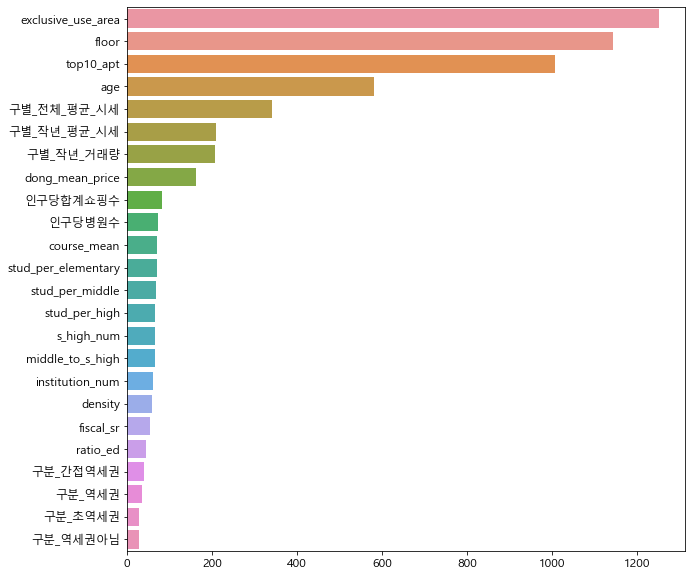

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(np.sort(final_model.feature_importances_)[::-1],Train_X.columns)